In [4]:
import pandas as pd

In [5]:
import seaborn as sb

In [6]:
DataDir = "./dataset1/"

In [7]:
import os

In [8]:
!ls ${DataDir}

ls: cannot access '$./dataset1/': No such file or directory


In [9]:
!ls $DataDir

lr.csv			  pp_sample_submission.csv.zip	pp_train.csv
mean.csv		  pp_test.csv			pp_train.csv.zip
pp_sample_submission.csv  pp_test.csv.zip		rf.csv


In [10]:
trainData = pd.read_csv(f'{DataDir}/pp_train.csv')

In [11]:
trainData.head(5)

,Unnamed: 0,t2m_obs,time,station,t2m_fc_mean,orog,station_alt,station_lat,station_lon,u_pl500_fc_mean,...,sp_fc_mean,tcc_fc_mean,sshf_fc_mean,slhf_fc_mean,u10_fc_mean,v10_fc_mean,ssr_fc_mean,str_fc_mean,d2m_fc_mean,sm_fc_mean
0,0,1.2,2011-01-01,3,-0.022290,107.439460,202.0,50.7827,6.0941,4.760467,...,101379.51,98.056010,634981.400,39645.008,2.208909,0.755302,2433034.8,-3513225.0,273.57892,374.63348
1,1,1.6,2011-01-01,44,2.086415,19.397774,44.0,52.9335,8.2370,14.442179,...,101709.04,98.741800,1592483.900,370638.600,6.223993,0.800821,2427059.2,-1702554.9,275.06873,388.60350
2,2,-6.3,2011-01-01,71,-6.609096,604.885000,759.0,48.2156,8.9784,0.254339,...,94432.85,91.602340,-1416809.800,-239365.980,-0.394419,-0.950840,4320586.0,-4435227.5,265.47473,437.02300
3,3,-3.0,2011-01-01,73,-5.071753,461.441800,340.0,48.6159,13.0506,2.489346,...,97368.55,91.139370,48696.496,-570603.400,1.923471,0.336067,5658946.5,-6691302.0,267.49640,366.52255
4,4,0.5,2011-01-01,78,1.743580,47.632523,65.0,52.4853,7.9126,11.600490,...,101419.82,99.178986,1435826.900,616228.750,4.472726,0.673820,2416039.5,-1872194.9,274.56433,263.73572


In [12]:
trainDataRaw = trainData.copy()

In [13]:
testData = pd.read_csv(f'{DataDir}/pp_test.csv')

In [14]:
testDataRaw = testData.copy()

In [15]:
trainData.shape

(980562, 26)

In [16]:
trainData.columns

Index(['Unnamed: 0', 't2m_obs', 'time', 'station', 't2m_fc_mean', 'orog',
       'station_alt', 'station_lat', 'station_lon', 'u_pl500_fc_mean',
       'v_pl500_fc_mean', 'gh_pl500_fc_mean', 'u_pl850_fc_mean',
       'v_pl850_fc_mean', 'q_pl850_fc_mean', 'cape_fc_mean', 'sp_fc_mean',
       'tcc_fc_mean', 'sshf_fc_mean', 'slhf_fc_mean', 'u10_fc_mean',
       'v10_fc_mean', 'ssr_fc_mean', 'str_fc_mean', 'd2m_fc_mean',
       'sm_fc_mean'],
      dtype='object')

In [17]:
trainData['t2m_obs']

0         1.2
1         1.6
2        -6.3
3        -3.0
4         0.5
5        -2.0
6         3.4
7         NaN
8        -1.5
9        -1.7
10       -1.5
11       -2.9
12       -1.3
13        NaN
14        1.4
15        1.9
16        NaN
17        1.3
18       -1.9
19       -0.6
20       -2.4
21       -1.1
22       -1.4
23       -0.8
24       -0.7
25       -2.6
26        2.1
27        2.4
28        1.3
29        0.1
         ... 
980532   -3.3
980533   -1.5
980534   -3.2
980535   -0.5
980536   -1.7
980537   -2.0
980538    0.7
980539    1.5
980540    1.3
980541   -0.6
980542   -2.0
980543    0.9
980544   -1.9
980545   -1.0
980546    0.9
980547    5.7
980548    2.8
980549    3.1
980550    1.3
980551    4.6
980552   -2.1
980553    1.5
980554    3.0
980555    NaN
980556    1.1
980557    NaN
980558    7.5
980559    0.4
980560   -0.4
980561    NaN
Name: t2m_obs, Length: 980562, dtype: float64

In [18]:
trainData.t2m_obs.mean()

7.531618395413346

In [19]:
import matplotlib.pyplot as plt

In [20]:
trainData.columns

Index(['Unnamed: 0', 't2m_obs', 'time', 'station', 't2m_fc_mean', 'orog',
       'station_alt', 'station_lat', 'station_lon', 'u_pl500_fc_mean',
       'v_pl500_fc_mean', 'gh_pl500_fc_mean', 'u_pl850_fc_mean',
       'v_pl850_fc_mean', 'q_pl850_fc_mean', 'cape_fc_mean', 'sp_fc_mean',
       'tcc_fc_mean', 'sshf_fc_mean', 'slhf_fc_mean', 'u10_fc_mean',
       'v10_fc_mean', 'ssr_fc_mean', 'str_fc_mean', 'd2m_fc_mean',
       'sm_fc_mean'],
      dtype='object')

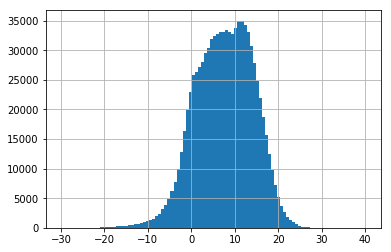

In [21]:
trainData.t2m_obs.hist(bins=100,range=(-30,40),label="t2m")

No handles with labels found to put in legend.


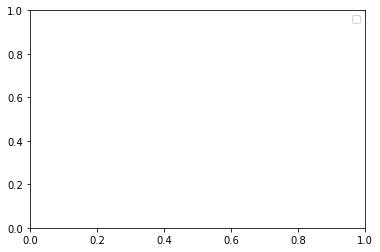

In [22]:
plt.legend()

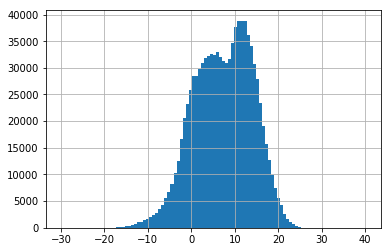

In [23]:
trainData.t2m_fc_mean.hist(bins=100,range=(-30,40),label="t2m_fc")

No handles with labels found to put in legend.


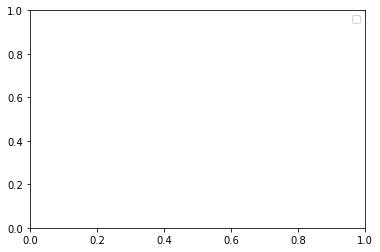

In [24]:
plt.legend();

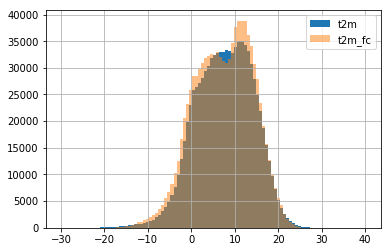

In [25]:
trainData.t2m_obs.hist(bins=100,range=(-30,40),label="t2m")
trainData.t2m_fc_mean.hist(bins=100,range=(-30,40),label="t2m_fc",alpha=0.5)
plt.legend()

In [26]:
X = trainData['t2m_obs']

In [27]:
Y = trainData['t2m_fc_mean']

In [28]:
X.dropna(inplace=True)

In [29]:
import numpy as np
Y.replace(np.nan, Y.mean(), inplace=True)

In [30]:
np.isnan(Y).any()

False

In [31]:
mse = ((Y - X) ** 2).mean()

In [32]:
mse

3.8667748393126327

In [33]:
np.isnan(X).any()

False

In [34]:
xy = ((Y - X) ** 2)

In [35]:
len(X)

908857

In [36]:
xy.sum()

3514345.380133267

In [37]:
xy.sum() / len(xy)

3.5840113936021045

In [38]:
X.shape

(908857,)

In [39]:
Y.shape

(980562,)

In [40]:
X = trainData['t2m_obs']
Y = trainData['t2m_fc_mean']

In [41]:
X.dropna(inplace=True)

In [42]:
Y.dropna(inplace=True)

In [43]:
X.shape == Y.shape

False

In [44]:
X.shape

(908857,)

In [45]:
Y.shape

(980562,)

In [46]:
trainData.dropna(subset=['t2m_obs'],inplace=True)

In [47]:
trainData.apply(pd.Series.isna).mean()

Unnamed: 0          0.00000
t2m_obs             0.00000
time                0.00000
station             0.00000
t2m_fc_mean         0.00000
orog                0.00000
station_alt         0.00000
station_lat         0.00000
station_lon         0.00000
u_pl500_fc_mean     0.00000
v_pl500_fc_mean     0.00000
gh_pl500_fc_mean    0.00000
u_pl850_fc_mean     0.00000
v_pl850_fc_mean     0.00000
q_pl850_fc_mean     0.00000
cape_fc_mean        0.00000
sp_fc_mean          0.00000
tcc_fc_mean         0.00000
sshf_fc_mean        0.00000
slhf_fc_mean        0.00000
u10_fc_mean         0.00000
v10_fc_mean         0.00000
ssr_fc_mean         0.00000
str_fc_mean         0.00000
d2m_fc_mean         0.00000
sm_fc_mean          0.09184
dtype: float64

In [48]:
X = trainData['t2m_obs']

In [49]:
X.shape

(908857,)

In [50]:
Y = trainData['t2m_fc_mean']

In [51]:
Y.shape

(908857,)

In [52]:
mse = ((Y - X) ** 2).mean()

In [53]:
mse

3.8667748393126327

In [54]:
xy = ((Y - X) ** 2)
mse2 = xy.sum() / len(xy)

In [55]:
mse2

3.8667748393127486

In [56]:
X.mean()

7.531618395413346

In [57]:
Y.mean()

7.279571712763294

In [58]:
bias = Y.mean() - X.mean()

In [59]:
bias

-0.25204668265005203

In [60]:
YPrime = Y + bias

In [61]:
def create_sub(preds, fn=None):
    df =  pd.DataFrame({'Id': range(len(preds)), 'Expected': preds})
    if fn is not None: df.to_csv(DATADIR + fn, index=False)
    return df

In [62]:
sub = create_sub(tYPrime)

NameError: name 'tYPrime' is not defined

In [ ]:
tYPrime

In [ ]:
YTest = tY + bias

In [ ]:
YTest

In [ ]:
bias

In [ ]:
sub = create_sub(YTest)

In [ ]:
sub.head(5)

In [ ]:
tY = testData['sm_fc_mean']

In [ ]:
tY.mean()

In [ ]:
testData['t2m_fc_mean'].replace(np.nan, testData['t2m_fc_mean'].mean(), inplace=True)

In [ ]:
tY = testData['t2m_fc_mean']

In [ ]:
tY.mean()

In [ ]:
tYY = tY + bias

In [ ]:
tYY.mean()

In [63]:
tYY.mean() - bias - bias

NameError: name 'tYY' is not defined

In [64]:
tYY = tY - bias

NameError: name 'tY' is not defined

In [65]:
df_sub = create_sub([tYY.mean()]*len(testData), 'mean.csv')

NameError: name 'tYY' is not defined

In [66]:
def create_sub(preds, fn=None):
    df =  pd.DataFrame({'Id': range(len(preds)), 'Expected': preds})
    if fn is not None: df.to_csv(DataDir + fn, index=False)
    return df

In [67]:
df_sub = create_sub([tYY.mean()]*len(testData), 'mean.csv')

NameError: name 'tYY' is not defined

In [68]:
df_sub

NameError: name 'df_sub' is not defined

In [69]:
!head ./dataset1/mean.csv

Id,Expected
0,4.253824682650052
1,1.185568682650052
2,0.06330520265005204
3,4.205052482650052
4,1.545451382650052
5,6.376793982650052
6,1.588017082650052
7,3.565169182650052
8,2.297659282650052


In [70]:
tYY.mean()

NameError: name 'tYY' is not defined

In [71]:
df_sub = create_sub(tYY, 'mean.csv')

NameError: name 'tYY' is not defined

In [72]:
df_sub

NameError: name 'df_sub' is not defined

In [73]:
Y

0        -0.022290
1         2.086415
2        -6.609096
3        -5.071753
4         1.743580
5        -1.646765
6         3.768420
8        -0.379339
9        -5.208958
10       -2.749108
11       -3.666374
12       -4.632233
14        0.545553
15        1.147215
17        2.085754
18       -3.162526
19        0.096329
20       -7.264445
21       -2.561441
22       -5.365300
23       -5.598772
24       -5.435004
25       -3.178556
26        0.893186
27        1.874417
28        0.474331
29       -0.606885
30       -3.679429
31        0.950570
32       -3.816793
            ...   
980529   -2.628169
980530    5.997656
980531    4.717664
980532   -1.751684
980533   -0.723174
980534   -1.904290
980535   -2.462491
980536   -0.023812
980537   -2.156344
980538   -0.022886
980539   -0.417117
980540   -1.045442
980541   -0.800716
980542   -3.825060
980543    1.865426
980544   -1.036089
980545   -2.769758
980546    1.036272
980547    4.859028
980548   -0.074273
980549    2.108365
980550    4.

In [74]:
trainData.columns

Index(['Unnamed: 0', 't2m_obs', 'time', 'station', 't2m_fc_mean', 'orog',
       'station_alt', 'station_lat', 'station_lon', 'u_pl500_fc_mean',
       'v_pl500_fc_mean', 'gh_pl500_fc_mean', 'u_pl850_fc_mean',
       'v_pl850_fc_mean', 'q_pl850_fc_mean', 'cape_fc_mean', 'sp_fc_mean',
       'tcc_fc_mean', 'sshf_fc_mean', 'slhf_fc_mean', 'u10_fc_mean',
       'v10_fc_mean', 'ssr_fc_mean', 'str_fc_mean', 'd2m_fc_mean',
       'sm_fc_mean'],
      dtype='object')

In [75]:
trainData['time']

0         2011-01-01
1         2011-01-01
2         2011-01-01
3         2011-01-01
4         2011-01-01
5         2011-01-01
6         2011-01-01
8         2011-01-01
9         2011-01-01
10        2011-01-01
11        2011-01-01
12        2011-01-01
14        2011-01-01
15        2011-01-01
17        2011-01-01
18        2011-01-01
19        2011-01-01
20        2011-01-01
21        2011-01-01
22        2011-01-01
23        2011-01-01
24        2011-01-01
25        2011-01-01
26        2011-01-01
27        2011-01-01
28        2011-01-01
29        2011-01-01
30        2011-01-01
31        2011-01-01
32        2011-01-01
             ...    
980529    2015-12-31
980530    2015-12-31
980531    2015-12-31
980532    2015-12-31
980533    2015-12-31
980534    2015-12-31
980535    2015-12-31
980536    2015-12-31
980537    2015-12-31
980538    2015-12-31
980539    2015-12-31
980540    2015-12-31
980541    2015-12-31
980542    2015-12-31
980543    2015-12-31
980544    2015-12-31
980545    201

In [76]:
trainData['time']

0         2011-01-01
1         2011-01-01
2         2011-01-01
3         2011-01-01
4         2011-01-01
5         2011-01-01
6         2011-01-01
8         2011-01-01
9         2011-01-01
10        2011-01-01
11        2011-01-01
12        2011-01-01
14        2011-01-01
15        2011-01-01
17        2011-01-01
18        2011-01-01
19        2011-01-01
20        2011-01-01
21        2011-01-01
22        2011-01-01
23        2011-01-01
24        2011-01-01
25        2011-01-01
26        2011-01-01
27        2011-01-01
28        2011-01-01
29        2011-01-01
30        2011-01-01
31        2011-01-01
32        2011-01-01
             ...    
980529    2015-12-31
980530    2015-12-31
980531    2015-12-31
980532    2015-12-31
980533    2015-12-31
980534    2015-12-31
980535    2015-12-31
980536    2015-12-31
980537    2015-12-31
980538    2015-12-31
980539    2015-12-31
980540    2015-12-31
980541    2015-12-31
980542    2015-12-31
980543    2015-12-31
980544    2015-12-31
980545    201

In [77]:
times = trainData['time']

In [78]:
times

0         2011-01-01
1         2011-01-01
2         2011-01-01
3         2011-01-01
4         2011-01-01
5         2011-01-01
6         2011-01-01
8         2011-01-01
9         2011-01-01
10        2011-01-01
11        2011-01-01
12        2011-01-01
14        2011-01-01
15        2011-01-01
17        2011-01-01
18        2011-01-01
19        2011-01-01
20        2011-01-01
21        2011-01-01
22        2011-01-01
23        2011-01-01
24        2011-01-01
25        2011-01-01
26        2011-01-01
27        2011-01-01
28        2011-01-01
29        2011-01-01
30        2011-01-01
31        2011-01-01
32        2011-01-01
             ...    
980529    2015-12-31
980530    2015-12-31
980531    2015-12-31
980532    2015-12-31
980533    2015-12-31
980534    2015-12-31
980535    2015-12-31
980536    2015-12-31
980537    2015-12-31
980538    2015-12-31
980539    2015-12-31
980540    2015-12-31
980541    2015-12-31
980542    2015-12-31
980543    2015-12-31
980544    2015-12-31
980545    201

In [79]:
trainData.loc[trainData['time'] == times[0]]

,Unnamed: 0,t2m_obs,time,station,t2m_fc_mean,orog,station_alt,station_lat,station_lon,u_pl500_fc_mean,...,sp_fc_mean,tcc_fc_mean,sshf_fc_mean,slhf_fc_mean,u10_fc_mean,v10_fc_mean,ssr_fc_mean,str_fc_mean,d2m_fc_mean,sm_fc_mean
0,0,1.2,2011-01-01,3,-0.022290,107.439460,202.0,50.7827,6.0941,4.760467,...,101379.51,98.056010,634981.400,3.964501e+04,2.208909,0.755302,2433034.8,-3513225.0,273.57892,374.63348
1,1,1.6,2011-01-01,44,2.086415,19.397774,44.0,52.9335,8.2370,14.442179,...,101709.04,98.741800,1592483.900,3.706386e+05,6.223993,0.800821,2427059.2,-1702554.9,275.06873,388.60350
2,2,-6.3,2011-01-01,71,-6.609096,604.885000,759.0,48.2156,8.9784,0.254339,...,94432.85,91.602340,-1416809.800,-2.393660e+05,-0.394419,-0.950840,4320586.0,-4435227.5,265.47473,437.02300
3,3,-3.0,2011-01-01,73,-5.071753,461.441800,340.0,48.6159,13.0506,2.489346,...,97368.55,91.139370,48696.496,-5.706034e+05,1.923471,0.336067,5658946.5,-6691302.0,267.49640,366.52255
4,4,0.5,2011-01-01,78,1.743580,47.632523,65.0,52.4853,7.9126,11.600490,...,101419.82,99.178986,1435826.900,6.162288e+05,4.472726,0.673820,2416039.5,-1872194.9,274.56433,263.73572
5,5,-2.0,2011-01-01,91,-1.646765,348.869900,300.0,50.7446,9.3450,4.736032,...,97728.27,99.158590,-437949.380,-1.315032e+05,2.346411,1.155579,2039684.1,-1838326.1,269.76184,373.94714
6,6,3.4,2011-01-01,102,3.768420,-0.193003,32.0,53.8617,8.1266,21.955555,...,101625.16,98.139130,459276.160,-8.183858e+05,12.632340,-0.445674,2508306.2,-3847206.0,276.19350,NaN
8,8,-1.5,2011-01-01,131,-0.379339,296.839200,296.0,51.0881,12.9326,8.423413,...,98477.74,85.506300,3846844.200,2.003674e+05,4.465709,1.232024,3020785.2,-5267415.0,271.58180,363.70914
9,9,-1.7,2011-01-01,142,-5.208958,461.575300,510.0,48.4060,11.3117,1.268854,...,96778.49,92.215470,-768286.300,-6.913277e+05,1.684356,0.762767,5720165.0,-6124677.0,267.60098,371.40472
10,10,-1.5,2011-01-01,150,-2.749108,246.744230,215.0,49.7273,8.1164,1.735267,...,99352.55,89.482086,-591442.100,-4.780380e+05,1.117148,0.089691,2945057.5,-3159958.0,268.67880,371.05695


In [80]:
trainData.shape

(908857, 26)

In [81]:
times.unique()

array(['2011-01-01', '2011-01-02', '2011-01-03', ..., '2015-12-29',
       '2015-12-30', '2015-12-31'], dtype=object)

In [82]:
times = times.unique()

In [83]:
XX = trainData.loc[trainData['time'] == times[0]]['t2m_obs']

In [84]:
YY = trainData.loc[trainData['time'] == times[0]]['t2m_fc_mean']

In [85]:
mse = ((YY - XX) ** 2).mean()

In [86]:
mse

5.5870308641542445

In [87]:
XX = trainData.loc[trainData['time'] == times[1]]['t2m_obs']

In [88]:
YY = trainData.loc[trainData['time'] == times[1]]['t2m_fc_mean']

In [89]:
mse2 = ((YY - XX) ** 2).mean()

In [90]:
mse2

4.567149720855405

In [92]:
bias = 0
for i in range(len(times)):
    time = times[i]
    XX = trainData.loc[trainData['time'] == time]['t2m_obs']
    YY = trainData.loc[trainData['time'] == time]['t2m_fc_mean']
    mse = ((YY - XX) ** 2).mean()
    bias = bias + mse

In [94]:
bias /= len(times)

In [95]:
bias

3.8661013630087266

In [93]:
"%d" % 2

'2'

In [96]:
sqrt(bias)

NameError: name 'sqrt' is not defined

In [97]:
np.sqrt(bias)

1.9662404133291347

In [98]:
error = Y - X

In [99]:
error

0        -1.222290
1         0.486415
2        -0.309096
3        -2.071753
4         1.243580
5         0.353235
6         0.368420
8         1.120661
9        -3.508958
10       -1.249108
11       -0.766374
12       -3.332233
14       -0.854447
15       -0.752785
17        0.785754
18       -1.262526
19        0.696329
20       -4.864445
21       -1.461441
22       -3.965300
23       -4.798772
24       -4.735004
25       -0.578556
26       -1.206814
27       -0.525583
28       -0.825669
29       -0.706885
30        0.220571
31        0.350570
32       -1.016793
            ...   
980529    0.471831
980530    0.897656
980531    0.617664
980532    1.548316
980533    0.776826
980534    1.295710
980535   -1.962491
980536    1.676188
980537   -0.156344
980538   -0.722886
980539   -1.917117
980540   -2.345442
980541   -0.200716
980542   -1.825060
980543    0.965426
980544    0.863911
980545   -1.769758
980546    0.136272
980547   -0.840972
980548   -2.874273
980549   -0.991635
980550    2.

In [100]:
trainData['error'] = Y - X